___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
#!pip install tensorflow

In [1]:
import tensorflow as tf
tf.__version__
# Google, TensorFlow'u sürekli olarak güncelleştirir ve yeni versionlar yayınlar.

'2.12.0'

# Keras Syntax Basics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (8,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# df = pd.read_csv("/content/drive/MyDrive/fake_reg.csv")

In [3]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [4]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


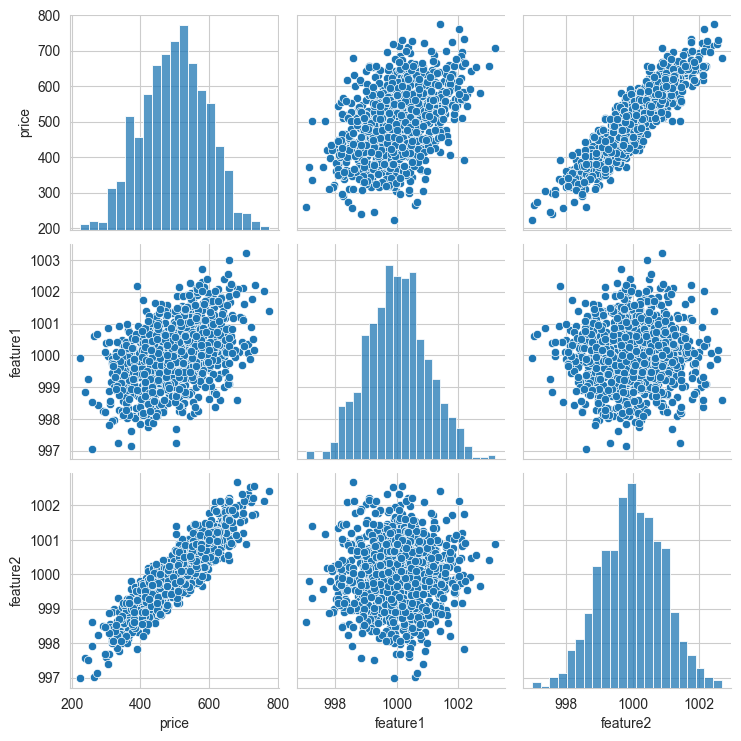

In [7]:
sns.pairplot(df);

In [8]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [9]:
from sklearn.model_selection import train_test_split

In [13]:
# X = df[['feature1', 'feature2']].values  # converts to array (if you don't sacle dataset create X and y like this)
# y = df['price'].values            

# DL'de datayı modele sokarken datamızı array'e ya da tensörlere çevirmeliyiz.

In [10]:
X = df[['feature1', 'feature2']]
y = df['price']

In [11]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [12]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
X_train.shape

(700, 2)

In [15]:
X_test.shape

(300, 2)

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Arka planda Gradient Descent olduğu için scale'e ihtiyaç duyuyoruz. 
# DL'de genelde MinMaxScaler daha iyi sonuçlar veriyor.

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [19]:
from tensorflow.keras.models import Sequential #ardışık 
from tensorflow.keras.layers import Input,Dense #layerları çağırdık. dense demek hidden,output demek

In [20]:
 help(Sequential)

# Sequential ; modelimiz ard arda dizilmiş katmanlardan oluşacaksa Sequential modeller kullanacağız.

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [25]:
#help(Dense)

# Dense ;  fully connected bir yapı istiyorsam ben dense layer kullanacağım.

In [21]:
X_train.shape

(700, 2)

In [78]:
# First way to create model

model = Sequential(
    [
                    Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),   # 3 tane hidden layer         
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)
    ]
)

In [79]:
# Second way to create model (recommended)


model = Sequential()    


#model.add(Input(shape = X_train.shape[1])) #alternative way

model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))


# Dense layer diyerek  eklenen layer'ın  fully connected bir layer olacağını  belirtiyoruz.
# son katmanda elimizde bir regresyon problemi olduğundan 1 nöron olmalı ve Aktivasyon fonksiyonunun defaultu ,
# None olduğu için tekrardan yazmadık.
# hidden layer sayısı nöron sayısı tamamen bize kalmış.
# Okunurluğu daha güzel olduğu için bunu kullanacağız.

In [80]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 4)                 12        
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.weights

# ilk atanan weight'leri bize veriyor ( random olarak atanıyor ) herkeste faarklı olabilir.

[<tf.Variable 'dense_40/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.7019751 , -0.40937924,  0.9833591 , -0.52277493],
        [ 0.25353646,  0.5508001 , -0.6213393 , -0.11434221]],
       dtype=float32)>,
 <tf.Variable 'dense_40/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_41/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.1214658 ,  0.3191561 , -0.03348845, -0.19443667],
        [-0.6491914 , -0.21741152, -0.7833208 , -0.2901227 ],
        [-0.82208204, -0.09538203,  0.48978037,  0.13339293],
        [-0.599368  ,  0.1630624 , -0.562325  , -0.59221625]],
       dtype=float32)>,
 <tf.Variable 'dense_41/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_42/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.17077738, -0.06503659,  0.2773971 ,  0.26313537],
        [-0.85722286, -0.21702337,  0.08582217, -0.07474244],
        [-0.41926217,  0.16960949,  0

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

            # For a multi-class classification problem
            model.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # For a binary classification problem
            model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

            # For a mean squared error regression problem
            model.compile(optimizer='rmsprop',
                          loss='mse')

In [82]:
model.compile(optimizer = "rmsprop", loss = "mse")

# regresyon  problemi olduğu için loss fonksiyonumuza mse yazdık.optimizasyon algoritması olarak rmsprop seçtik ; 
# diğer optimizasyon algoritmaları da kullanabilirdi.

In [83]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256691.9062
Epoch 2/250
22/22 [==============================] - 0s 5ms/step - loss: 256638.4062
Epoch 3/250
22/22 [==============================] - 0s 5ms/step - loss: 256585.0312
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256527.2188
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 256462.4531
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 256387.2500
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 256300.1562
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 256200.0469
Epoch 9/250
22/22 [==============================] - 0s 4ms/step - loss: 256086.6719
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 255958.9219
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 255815.5000
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 3ms/step - loss: 21665.1543
Epoch 97/250
22/22 [==============================] - 0s 3ms/step - loss: 18043.5098
Epoch 98/250
22/22 [==============================] - 0s 3ms/step - loss: 14719.0498
Epoch 99/250
22/22 [==============================] - 0s 5ms/step - loss: 11753.0957
Epoch 100/250
22/22 [==============================] - 0s 4ms/step - loss: 9187.4629
Epoch 101/250
22/22 [==============================] - 0s 5ms/step - loss: 7016.4014
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 5341.6719
Epoch 103/250
22/22 [==============================] - 0s 4ms/step - loss: 4109.7720
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 3325.0720
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 2967.1628
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 2874.8135
Epoch 107/250
22/22 [==============================] - 0s 3ms/step - loss: 283

22/22 [==============================] - 0s 5ms/step - loss: 297.8744
Epoch 193/250
22/22 [==============================] - 0s 3ms/step - loss: 281.7928
Epoch 194/250
22/22 [==============================] - 0s 6ms/step - loss: 265.3980
Epoch 195/250
22/22 [==============================] - 0s 4ms/step - loss: 249.5132
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 235.6470
Epoch 197/250
22/22 [==============================] - 0s 3ms/step - loss: 223.4103
Epoch 198/250
22/22 [==============================] - 0s 3ms/step - loss: 208.7427
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 197.1196
Epoch 200/250
22/22 [==============================] - 0s 4ms/step - loss: 186.5260
Epoch 201/250
22/22 [==============================] - 0s 4ms/step - loss: 173.9313
Epoch 202/250
22/22 [==============================] - 0s 4ms/step - loss: 161.9370
Epoch 203/250
22/22 [==============================] - 0s 4ms/step - loss: 151.2110
Epoch 

In [84]:
model.weights
# random olarak atanan weight'lerin değiştiğini görebiliriz.

[<tf.Variable 'dense_40/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.23402384, -0.5984252 ,  2.9082093 , -0.52277493],
        [ 3.3289719 ,  0.34740925,  3.4487615 , -0.11434221]],
       dtype=float32)>,
 <tf.Variable 'dense_40/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.05826798, -0.20179036,  1.054192  ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_41/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.1214658 ,  0.25035402,  2.4100924 ,  2.2090275 ],
        [-0.6491914 , -0.22914997, -0.60480297, -0.22293864],
        [-0.82208204, -0.15505897,  2.9080899 ,  2.4020808 ],
        [-0.599368  ,  0.1630624 , -0.562325  , -0.59221625]],
       dtype=float32)>,
 <tf.Variable 'dense_41/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        , -0.06882466,  1.0329883 ,  0.8930162 ], dtype=float32)>,
 <tf.Variable 'dense_42/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.17077738, -0.06503659,  0.2773971 ,  0.26313537],
        [-0.85722286, -0.15

In [85]:
model.history.history

{'loss': [256691.90625,
  256638.40625,
  256585.03125,
  256527.21875,
  256462.453125,
  256387.25,
  256300.15625,
  256200.046875,
  256086.671875,
  255958.921875,
  255815.5,
  255654.265625,
  255475.21875,
  255275.890625,
  255055.5,
  254811.953125,
  254544.390625,
  254252.0,
  253930.265625,
  253578.953125,
  253198.46875,
  252785.671875,
  252339.515625,
  251857.625,
  251336.0,
  250776.359375,
  250176.953125,
  249534.375,
  248843.0625,
  248106.90625,
  247324.796875,
  246489.6875,
  245602.125,
  244662.109375,
  243660.578125,
  242603.15625,
  241481.53125,
  240301.34375,
  239052.984375,
  237739.421875,
  236357.09375,
  234918.3125,
  233396.890625,
  231796.53125,
  230124.109375,
  228362.875,
  226521.9375,
  224595.75,
  222559.390625,
  220412.296875,
  218168.578125,
  215805.734375,
  213317.9375,
  210728.546875,
  208014.703125,
  205200.015625,
  202254.828125,
  199190.3125,
  195996.234375,
  192697.09375,
  189256.65625,
  185732.1875,
  18204

In [28]:
pd.DataFrame(model.history.history)

,loss
0,256797.469
1,256535.047
2,256287.812
3,256005.594
4,255678.125
...,...
245,24.133
246,24.458
247,24.626
248,24.416


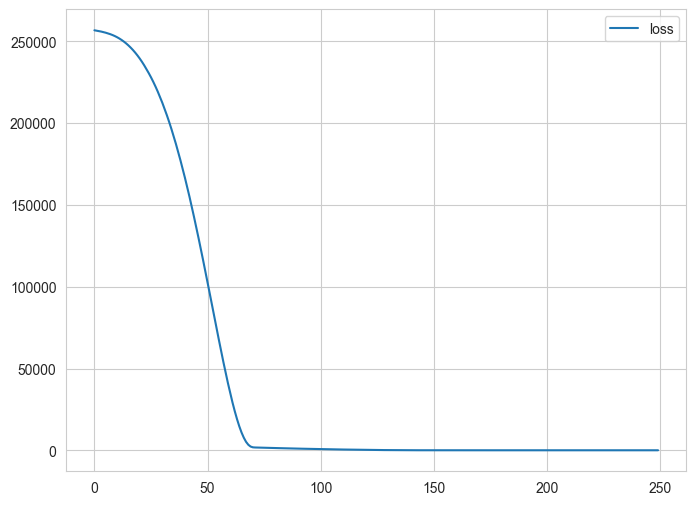

In [29]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

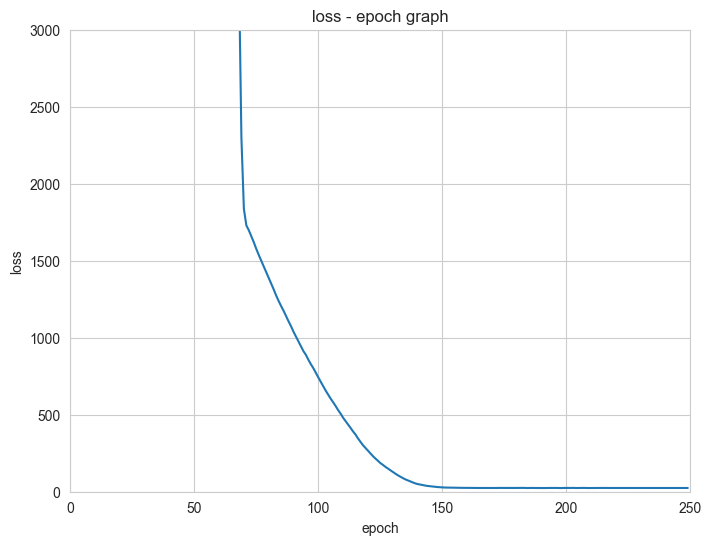

In [30]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]); # focusing on the given y values 

## Model Performance

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
model.evaluate(X_train, y_train, verbose=0)

# compile satırında loss parameteresinin karşısınıa ne yazarsak onun skoru/skorları döner.
# model.evaluate arka planda burada predict yapıyor.

24.090749740600586

In [33]:
model.evaluate(X_test, y_test, verbose=0)

26.021236419677734

In [41]:
# şu şekilde de yapabiliriz : 

In [34]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [35]:
y_pred.shape

(300, 1)

In [36]:
y_test.shape

(300,)

In [37]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}   # y_pred'in sonucu 2 boyutlu bir aray
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
235,593.668,611.727
65,547.276,552.011
613,497.465,493.596
626,514.406,515.975
975,447.053,446.718
377,642.371,647.064
449,383.934,388.843
655,406.288,404.854
822,564.672,563.648
165,337.951,341.498


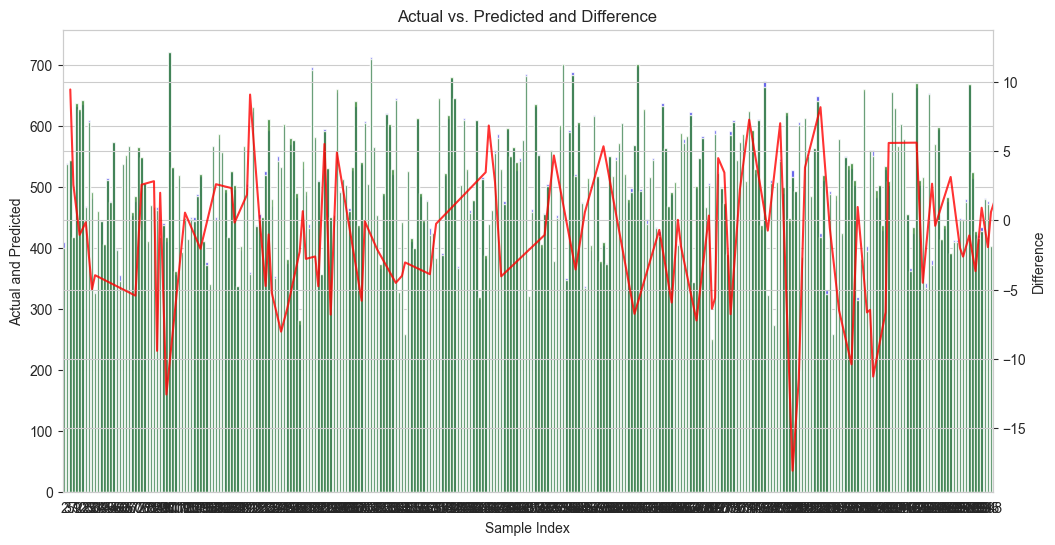

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gerçek ve tahmin edilen değerleri içeren veri çerçevesi
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)

# Gerçek ve tahmin edilen değerler arasındaki farkı hesaplayın
compare["Diff"] = compare["Actual"] - compare["Pred"]

# Çizgi ve çubuk grafiklerini oluşturun
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
sns.lineplot(data=compare, x=compare.index, y="Diff", ax=ax2, color="red", alpha=0.8)
sns.barplot(data=compare, x=compare.index, y="Actual", ax=ax, color="blue", alpha=0.8)
sns.barplot(data=compare, x=compare.index, y="Pred", ax=ax, color="green", alpha=0.8)

# Eksenleri ve başlıkları ayarlayın
ax.set_xlabel("Sample Index")
ax.set_ylabel("Actual and Predicted")
ax2.set_ylabel("Difference")
ax.set_title("Actual vs. Predicted and Difference")

plt.show()




In [38]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = mean_squared_error(actual, pred,squared=False)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [39]:
eval_metric(y_test, y_pred)

r2_score: 0.9970403608763214 
mae: 4.126425272266288 
mse: 26.021240893575964 
rmse: 5.101101929345851


## Final Model and Model Deployment

### Final Model Training

In [40]:
scaler = MinMaxScaler().fit(X)

In [41]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [42]:
X_scaled = scaler.transform(X)
X_scaled

array([[0.44380388, 0.4885581 ],
       [0.29323398, 0.71363026],
       [0.48977598, 0.32595231],
       ...,
       [0.7144056 , 0.32658556],
       [0.60372768, 0.27637009],
       [0.35350286, 0.78575664]])

In [43]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

In [52]:
#model.summary()

In [53]:
#model.weights

In [44]:
final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

#input_dim = 2 or input_dim = X_train.shape[1] yazmamamıza rağmen model.fit kısmında 2 feature olduğunu algoritma anlıyor.
# yazmazsak ama fit etmeden model.summary()'i çalıştırdığımızda hata alırız .

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 257453.5469
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 257406.4219
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 257373.9219
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 257342.0469
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 257310.1562
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 257278.3438
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 257246.3906
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 257214.4375
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 257182.6406
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 257150.6406
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 257118.7344
Epoch 12/250
32/32 [==============================] - 0s 3ms/st

32/32 [==============================] - 0s 3ms/step - loss: 254417.0625
Epoch 97/250
32/32 [==============================] - 0s 3ms/step - loss: 254385.3750
Epoch 98/250
32/32 [==============================] - 0s 3ms/step - loss: 254353.6562
Epoch 99/250
32/32 [==============================] - 0s 3ms/step - loss: 254321.9844
Epoch 100/250
32/32 [==============================] - 0s 5ms/step - loss: 254290.2969
Epoch 101/250
32/32 [==============================] - 0s 6ms/step - loss: 254258.5625
Epoch 102/250
32/32 [==============================] - 0s 5ms/step - loss: 254226.8594
Epoch 103/250
32/32 [==============================] - 0s 4ms/step - loss: 254195.2500
Epoch 104/250
32/32 [==============================] - 0s 4ms/step - loss: 254163.4219
Epoch 105/250
32/32 [==============================] - 0s 3ms/step - loss: 254131.7812
Epoch 106/250
32/32 [==============================] - 0s 4ms/step - loss: 254100.1562
Epoch 107/250
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 3ms/step - loss: 251446.2656
Epoch 191/250
32/32 [==============================] - 0s 3ms/step - loss: 251414.7500
Epoch 192/250
32/32 [==============================] - 0s 3ms/step - loss: 251383.2500
Epoch 193/250
32/32 [==============================] - 0s 3ms/step - loss: 251351.7500
Epoch 194/250
32/32 [==============================] - 0s 4ms/step - loss: 251320.3438
Epoch 195/250
32/32 [==============================] - 0s 3ms/step - loss: 251288.7656
Epoch 196/250
32/32 [==============================] - 0s 5ms/step - loss: 251257.2500
Epoch 197/250
32/32 [==============================] - 0s 4ms/step - loss: 251225.8125
Epoch 198/250
32/32 [==============================] - 0s 3ms/step - loss: 251194.4062
Epoch 199/250
32/32 [==============================] - 0s 3ms/step - loss: 251162.9062
Epoch 200/250
32/32 [==============================] - 0s 3ms/step - loss: 251131.3281
Epoch 201/250
32/32 [==============================] - 0s

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)


There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [45]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
#final_model.save("model_fake_reg") 

### Loading Model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model_fake_reg = load_model('model_fake_reg.h5')

In [48]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [49]:
sample = [[998, 1000]]

In [50]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[0.15312457, 0.52980619]])

In [51]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 110ms/step


array([[8.003988]], dtype=float32)

## Prediction-2

In [52]:
my_dict = {"feature1": [997, 998, 999, 1000, 1001],
           "feature2": [1000, 999, 998, 997, 996]}

In [53]:
sample = pd.DataFrame(my_dict)
sample

,feature1,feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [54]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [55]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 32ms/step


array([[8.003988],
       [8.003988],
       [8.003988],
       [8.003988],
       [8.003988]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___